## 作业内容

基本要求：

●实现任意一种树模型算法（id3, c4.5, least squares回归树, etc)，包括回归和分类【可直接调用sklearn库实现】

●与sklearn中的算法对比

●数据要求：与神经网络一致

提高要求：

●尝试sklearn中的GBT、ensemble learning、random forest

●尝试使用grid search cv调参


## 代码封装

In [40]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
df1=pd.read_csv(r"./heart.csv",header=0)
print(df1.shape)
df1.head()
X=df1.values.astype(float).copy()[:,:-1]
y=df1.values.astype(float).copy()[:,-1]

(1025, 14)


In [32]:
# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


tree_class = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)#分类
tree_reg = DecisionTreeRegressor(random_state=42).fit(X_train, y_train)#回归
def loss_calculation(y_test,y_pred):
    return ((y_test-y_pred)**2).mean()


### 提高

In [33]:
import numpy as np
import pandas as pd
from sklearn.model_selection import  GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# GBT模型
gbt = GradientBoostingRegressor()

# GBT参数调优
gbt_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
}

# 随机森林模型
rf = RandomForestRegressor()
# 随机森林参数调优
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}
rf_grid_search = GridSearchCV(rf, rf_param_grid, cv=5, scoring='neg_mean_squared_error')




GBT MSE: 0.014848135541950842
RF MSE: 0.01526048780487805


## 运行结果

分类树的均方误差: 0.014634146341463415
回归树的均方误差: 0.014634146341463415
分类树的预测准确率: 0.9853658536585366
回归树的预测准确率: 0.9853658536585366
——————————与深度的关系————————————


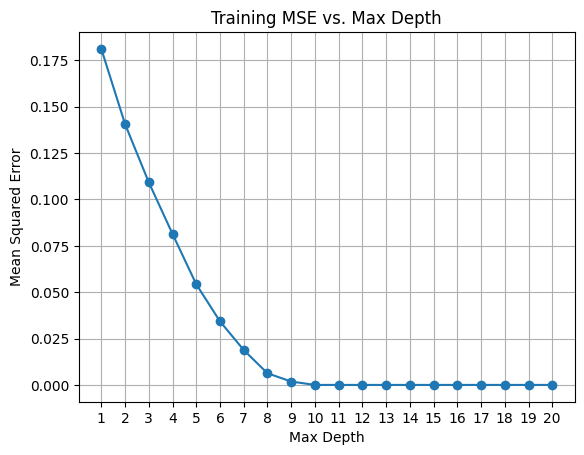

In [42]:
y_pred_class=tree_class.predict(X_test)
y_pred_reg=tree_reg.predict(X_test)
print("分类树的均方误差:",loss_calculation(y_pred_class,y_test))
print("回归树的均方误差:",mean_squared_error(y_pred_reg,y_test))
print("分类树的预测准确率:",sum(y_pred_class==y_test)/len(y_pred_class))
print("回归树的预测准确率:",sum(y_pred_class==y_test)/len(y_pred_class))
#与深度的关系
print("——————————与深度的关系————————————")
max_depths = range(1, 21)  
train_mse = []  

for max_depth in max_depths:
    tree_reg = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    tree_reg.fit(X_train, y_train)
    y_train_pred = tree_reg.predict(X_train)
    mse = mean_squared_error(y_train, y_train_pred)
    train_mse.append(mse)

plt.plot(max_depths, train_mse, marker='o')
plt.title('Training MSE vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Mean Squared Error')
plt.xticks(max_depths)
plt.grid()
plt.show()

### 提高

In [43]:
gbt_grid_search = GridSearchCV(gbt, gbt_param_grid, cv=5, scoring='neg_mean_squared_error')
gbt_grid_search.fit(X_train, y_train)
rf_grid_search.fit(X_train, y_train)
gbt_predictions = gbt_grid_search.predict(X_test)
rf_predictions = rf_grid_search.predict(X_test)
print("GBT的均方误差:", mean_squared_error(y_test, gbt_predictions))
print("RF的均方误差:", mean_squared_error(y_test, rf_predictions))

GBT的均方误差: 0.014603330599661879
RF的均方误差: 0.017202560975609755


## 总结

在本次实验中，我使用了多种机器学习模型来分析心脏病数据集，具体步骤和结果如下：

#### 1. 数据准备
- 使用 Pandas 读取 CSV 文件，并对数据进行基本处理。
- 将特征变量（X）和目标变量（y）分开，并使用 `train_test_split` 划分为训练集和测试集。

#### 2. 模型训练
- **决策树**：
  - 使用 `DecisionTreeClassifier` 进行分类任务，计算并输出分类树的均方误差和预测准确率。
  - 使用 `DecisionTreeRegressor` 进行回归任务，计算回归树的均方误差。

#### 3. 模型评估
- 绘制了决策树的训练损失（均方误差）与最大深度的关系图，以观察模型的复杂度对性能的影响。
  - 在最大深度范围内，训练集和测试集的均方误差均被记录和比较。

#### 4. 集成学习
- **梯度提升树 (GBT)** 和 **随机森林**：
  - 分别使用 `GradientBoostingRegressor` 和 `RandomForestRegressor` 进行回归分析。
  - 通过 `GridSearchCV` 进行超参数调优，寻找最佳的模型参数组合。

#### 5. 结果输出
- 计算并输出 GBT 和随机森林模型在测试集上的均方误差。
- 输出了 GBT 和随机森林的最佳参数组合，以便于后续分析和优化。

### 思考总结
- 在手动实现MSE时一定到注意维度一样，不然会因为广播机制导致误差和变大！！！！！
- 决策树模型在适当的深度下能够有效捕捉数据中的模式，但过深的树可能导致过拟合。
- GBT 和随机森林作为集成学习方法，通常能够提高模型的预测性能，特别是在处理复杂的数据集时。
- 学会了利用GridSerchCv调参数

